In [117]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import operator

%matplotlib inline

In [118]:
train = pd.read_csv('../data/train.csv', index_col='ID')
test = pd.read_csv('../data/test.csv', index_col='ID')

In [119]:
raw = pd.concat([train[train.columns.drop('TARGET')], test], axis=0)

## Feature Analysis

In [120]:
def get_constant_features(df):
    columns = df.columns
    return [col for col in columns if df[col].std() == 0.0]

constant_features = get_constant_features(train)

In [121]:
def identical_features(df):
    columns = df.columns
    identical_feat = []
    
    for i in range(len(columns)):
        for j in range(i+1, len(columns)):
            if (df[columns[i]] == df[columns[j]]).all():
                identical_feat.append(columns[i])
    
    return identical_feat

identical_feat = identical_features(train)

In [122]:
identical_feat_list = list(set(identical_feat))

In [124]:
def get_features_to_remove(constant_features, identical_features):
    features_to_remove = []
    
    for feat in constant_features:
        features_to_remove.append(feat)
    
    for feat in identical_features:
        features_to_remove.append(feat)
    
    return features_to_remove

In [125]:
features_to_remove = get_features_to_remove(constant_features, identical_feat_list)

In [126]:
features_to_remove.append('TARGET')
final_features = train.columns.drop(features_to_remove)

In [127]:
X = train[final_features]
y = train.TARGET

In [21]:
from sklearn.cross_validation import StratifiedShuffleSplit

sss = StratifiedShuffleSplit(y, n_iter=3, train_size=5000, random_state=44)
train_index, test_index = next(iter(sss))

X_train = X.iloc[train_index]
y_train = y.iloc[train_index]

In [156]:
(X > X.quantile(q=0.99)).astype(np.int).head()

,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,...,saldo_medio_var29_ult3,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38
ID,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Visualize mean and standard deviation of each of the features

In [128]:
X_mean = X.mean()

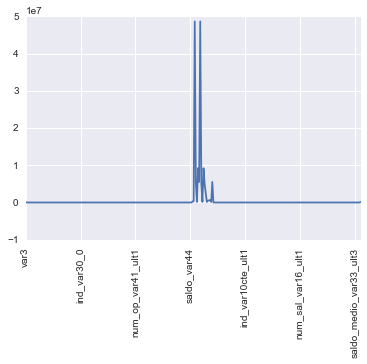

In [131]:
X_mean.plot()
plt.xticks(rotation=90);

In [132]:
X_std = X.std()

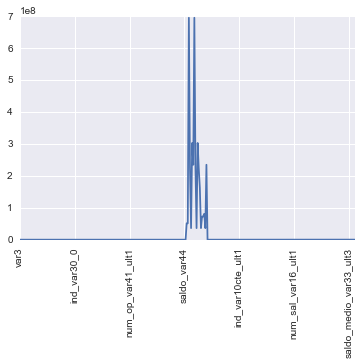

In [133]:
X_std.plot()
plt.xticks(rotation=90);

## Mean and standard deviation on the basis of target variable

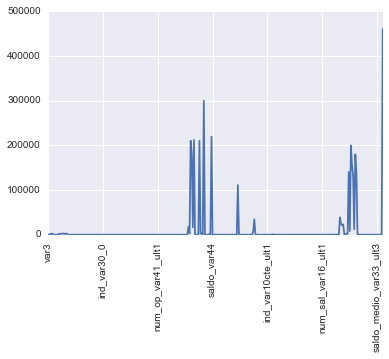

In [151]:
train[train.TARGET == 0][final_features].quantile(q=0.99).plot()
plt.xticks(rotation=90);

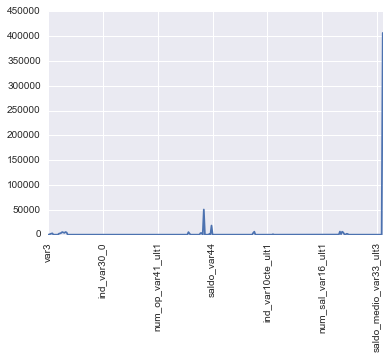

In [154]:
train[train.TARGET == 1][final_features].quantile(q=0.99).plot()
plt.xticks(rotation=90);

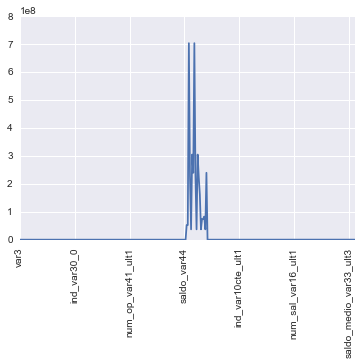

In [136]:
train[train.TARGET == 0][final_features].std().plot()
plt.xticks(rotation=90);

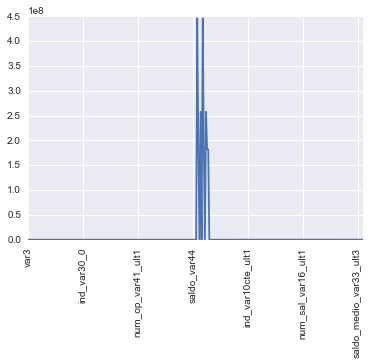

In [137]:
train[train.TARGET == 1][final_features].std().plot()
plt.xticks(rotation=90);

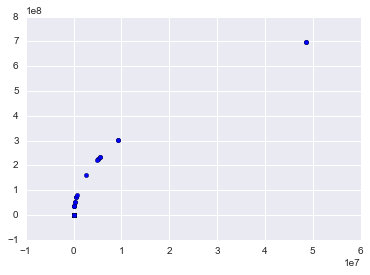

In [138]:
plt.scatter(X_mean, X_std);

In [141]:
list(final_features.values).index('saldo_var44')

150

In [142]:
final_features[130:175]

Index([u'saldo_var12', u'saldo_var13_corto', u'saldo_var13_largo',
       u'saldo_var13', u'saldo_var14', u'saldo_var17', u'saldo_var18',
       u'saldo_var20', u'saldo_var24', u'saldo_var26', u'saldo_var25',
       u'saldo_var29', u'saldo_var30', u'saldo_var31', u'saldo_var32',
       u'saldo_var33', u'saldo_var34', u'saldo_var37', u'saldo_var40',
       u'saldo_var42', u'saldo_var44', u'var36', u'delta_imp_amort_var18_1y3',
       u'delta_imp_amort_var34_1y3', u'delta_imp_aport_var13_1y3',
       u'delta_imp_aport_var17_1y3', u'delta_imp_aport_var33_1y3',
       u'delta_imp_compra_var44_1y3', u'delta_imp_venta_var44_1y3',
       u'delta_num_aport_var13_1y3', u'delta_num_aport_var17_1y3',
       u'delta_num_aport_var33_1y3', u'delta_num_compra_var44_1y3',
       u'delta_num_reemb_var13_1y3', u'delta_num_reemb_var17_1y3',
       u'delta_num_reemb_var33_1y3', u'delta_num_trasp_var17_in_1y3',
       u'delta_num_trasp_var17_out_1y3', u'delta_num_trasp_var33_in_1y3',
       u'delta_num_tra

### Number of unique values for each of the features

In [30]:
def get_num_unique_values(df):
    columns = df.columns
    num_unique_map =  {}
    
    for col in columns:
        num_unique_map[col] = len(df[col].unique())
    
    # sort them in descending order by number of unique values each column has
    return sorted(num_unique_map.items(), key=operator.itemgetter(1), reverse=True)

num_unique_map = get_num_unique_values(raw)

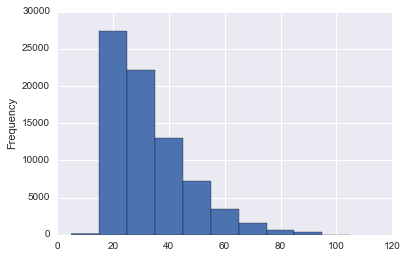

In [114]:
train.loc[:, 'var15'].plot(kind='hist');

In [115]:
pd.crosstab(train.var15, train.TARGET)

TARGET,0,1
var15,,
5,28,0
6,21,0
7,6,0
8,9,0
9,18,0
10,17,0
11,19,0
12,11,0
13,11,0


In [48]:
train.loc[:, 'rounded_var_38'] = train.var38.map(np.round)

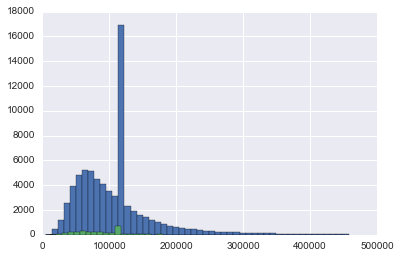

In [47]:
mask_neg = (train.var38 < train.var38.quantile(q=0.99)) & ((train.TARGET == 0))
mask_pos = (train.var38 < train.var38.quantile(q=0.99)) & ((train.TARGET == 1))

plt.hist(train[mask_neg].var38, bins=50)
plt.hist(train[mask_pos].var38, bins=50);

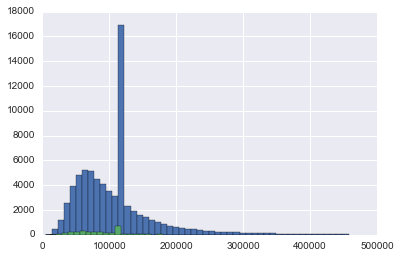

In [49]:
mask_neg = (train.rounded_var_38 < train.rounded_var_38.quantile(q=0.99)) & ((train.TARGET == 0))
mask_pos = (train.rounded_var_38 < train.rounded_var_38.quantile(q=0.99)) & ((train.TARGET == 1))

plt.hist(train[mask_neg].rounded_var_38, bins=50)
plt.hist(train[mask_pos].rounded_var_38, bins=50);

In [54]:
# group by var38 and TARGET to see what's happening
train.groupby(['rounded_var_38', 'TARGET']).size().unstack(1).fillna(0).sort_values(by=1, ascending=False).head(10)

TARGET,0,1
rounded_var_38,,
117311,14254,614
51769,0,3
122989,2,2
84070,0,2
40742,0,2
90130,0,2
55270,1,2
55275,1,2
128972,1,2


In [62]:
# lets look at what are the values for other variables at this suspicious value for rounded_var_38
train[train.rounded_var_38 == 117311].head()

,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,...,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET,rounded_var_38
ID,,,,,,,,,,,,,,,,,,,,,
10,2,39,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,117310.979016,0,117311
36,2,44,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,117310.979016,0,117311
51,2,35,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,117310.979016,0,117311
56,2,42,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,117310.979016,0,117311
83,2,42,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,117310.979016,0,117311


In [65]:
unique_subframe = train[train.rounded_var_38 == 117311]

In [88]:
sorted_values = unique_subframe.groupby(['num_var45_ult3', 'TARGET']).size().unstack(1).fillna(0).sort_values(by=1, ascending=False)

In [89]:
sorted_values.head()

TARGET,0,1
num_var45_ult3,,
0,7242,364
3,1529,66
6,974,35
9,630,19
12,476,16


In [90]:
train.groupby(['num_var45_ult3', 'TARGET']).size().unstack(1).fillna(0).sort_values(by=1, ascending=False).head()

TARGET,0,1
num_var45_ult3,,
0,36704,1652
3,7858,343
6,4657,194
9,3327,111
12,2523,77


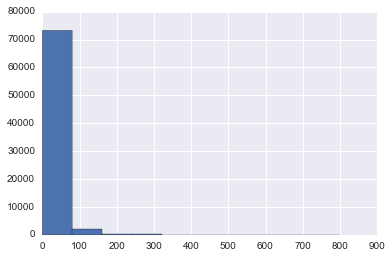

In [97]:
plt.hist(train.num_var45_ult3);

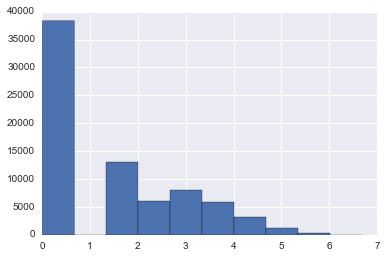

In [98]:
plt.hist(np.log(1 + train.num_var45_ult3));

In [112]:
train.columns

Index([u'var3', u'var15', u'imp_ent_var16_ult1', u'imp_op_var39_comer_ult1',
       u'imp_op_var39_comer_ult3', u'imp_op_var40_comer_ult1',
       u'imp_op_var40_comer_ult3', u'imp_op_var40_efect_ult1',
       u'imp_op_var40_efect_ult3', u'imp_op_var40_ult1',
       ...
       u'saldo_medio_var33_hace3', u'saldo_medio_var33_ult1',
       u'saldo_medio_var33_ult3', u'saldo_medio_var44_hace2',
       u'saldo_medio_var44_hace3', u'saldo_medio_var44_ult1',
       u'saldo_medio_var44_ult3', u'var38', u'TARGET', u'rounded_var_38'],
      dtype='object', length=371)

## Exploratory Data Analysis

In [23]:
from sklearn.manifold import TSNE

In [ ]:
# add boolean indicators whether value is an outlier or not
def outlier_indicator(row):

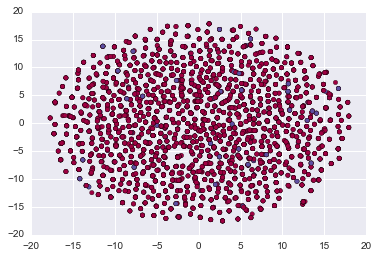

In [33]:
tsne = TSNE(n_components=2, perplexity=2.0, init='random', random_state=0)
Y_transformed = tsne.fit_transform(X_train)
plt.scatter(Y_transformed[:, 0], Y_transformed[:, 1], c=y_train, cmap=plt.cm.Spectral);

** It seems it is very hard to isolate satisfied customers from ones that are not so satisfied **

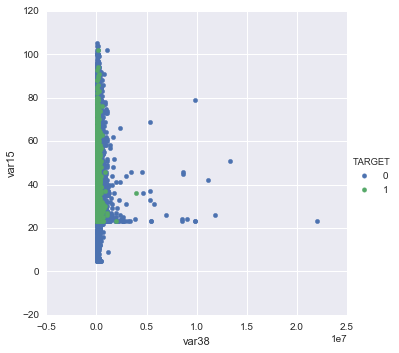

In [8]:
sns.FacetGrid(train, hue='TARGET', size=5) \
    .map(plt.scatter, 'var38', 'var15') \
    .add_legend();

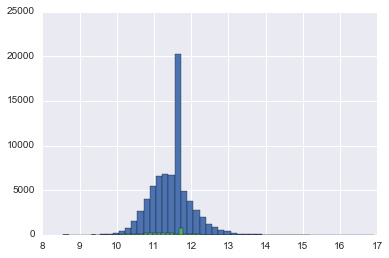

In [12]:
plt.hist(np.log1p(1 + train[train.TARGET==0].var38), bins=50)
plt.hist(np.log1p(1 + train[train.TARGET==1].var38), bins=50);

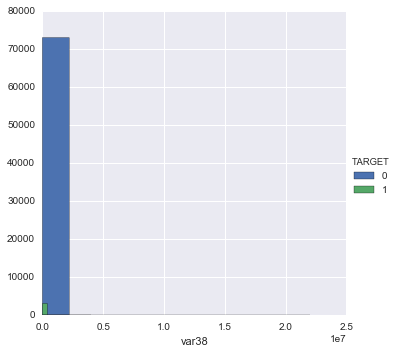

In [9]:
sns.FacetGrid(train, hue='TARGET', size=5) \
    .map(plt.hist, 'var38') \
    .add_legend();

## Principal Component Analysis

In [184]:
from sklearn.decomposition import KernelPCA
from sklearn.preprocessing import StandardScaler

In [207]:
X = train[features].iloc[:10000]
y = train.TARGET.iloc[:10000]

In [208]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [209]:
pca = KernelPCA(n_components=2, kernel='rbf', gamma=.01)
X_pca = pca.fit_transform(X_scaled, y)

In [210]:
negative_class_labels = (y==0).values
positive_class_labels = (y==1).values

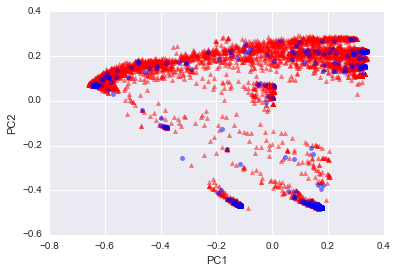

In [211]:
colors = ['b', 'g']
markers = ['s', 'x']

plt.scatter(X_pca[negative_class_labels, 0], X_pca[negative_class_labels, 1],
            color='red', marker='^', alpha=.5)

plt.scatter(X_pca[positive_class_labels, 0], X_pca[positive_class_labels, 1],
            color='blue', marker='o', alpha=.5)

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show();

In [222]:
print 'Total number of features %d and features with value greater than 90th percentile for satisfied customers %d ' %(len(features),\
                                                                                                                      count)

Total number of features 369 and features with value greater than 90th percentile for satisfied customers 80 
